# 🔍 ANOMALY DETECTION IN MAMBA SEEDLING STUDENTS
## Phase 1: Initial Exploratory Data Analysis (EDA)

---

### RESEARCH QUESTION
**What students in the seedling exhibit UNUSUAL, inconsistent, or potentially risky behavioral patterns within their academic and socioeconomic context?**

### OBJECTIVES OF THIS SECTION:
1. Load and explore the seedling data
2. Understand the structure and characteristics of the dataset
3. Identify key variables for anomaly detection
4. Visualize initial distributions and relationships
5. Prepare the foundation for anomaly detection models

In [ ]:
# 1. IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configure visualization styles
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully")

✅ Librerías importadas correctamente


In [ ]:
# 2. LOAD THE DATA
import json

# Path to JSON file
data_path = r'c:\Users\DELL\Documents\GitHub\material-DT-1\Análisis Nuevo\data\RespuestasSemillero_completo.json'

# Load data
with open(data_path, 'r', encoding='utf-8') as f:
    json_data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(json_data)

print(f"✅ Data loaded successfully")
print(f"\n📊 Dataset dimensions: {df.shape[0]} students × {df.shape[1]} variables")
print(f"\n📋 First 5 rows of the dataset:")
df.head()

✅ Datos cargados correctamente

📊 Dimensiones del dataset: 81 estudiantes × 35 variables

📋 Primeras 5 filas del dataset:


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35
0,0,21,5,1,3,4,2,3,7,Learn meaningfully,...,1,1,9,17,Get a job in the knowledge area,Data analysis through machine learning,4,5,4,4
1,0,20,5,1,2,5,6,4,0,Learn meaningfully,...,0,0,8,17,It is a personal goal,Backend development,2,3,4,4
2,1,23,5,1,2,3,2,1,2,Develop my soft skills (Interpersonal qualities),...,0,0,10,18,Graduation option,Graphic interface design and user experience,2,4,4,4
3,1,25,5,1,3,5,4,8,0,Develop my soft skills (Interpersonal qualities),...,0,0,10,22,It is a personal goal,Frontend development,2,4,4,5
4,1,21,5,1,2,4,1,1,2,Learn meaningfully,...,1,1,8,18,It is a personal goal,Data analysis through machine learning,2,3,4,4


In [ ]:
# 3. INITIAL STRUCTURE ANALYSIS

print("="*80)
print("GENERAL DATASET INFORMATION")
print("="*80)

# Data types
print(f"\n🔍 Data types:")
print(df.dtypes)

# General information
print(f"\n📌 Information about missing values:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("   ✅ No missing values in the dataset")
else:
    print(missing_values[missing_values > 0])

# Columns
print(f"\n📝 Total of variables (columns): {len(df.columns)}")
print(f"\nVariable names:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

INFORMACIÓN GENERAL DEL DATASET

🔍 Tipos de datos:
Q1     object
Q2     object
Q3     object
Q4     object
Q5     object
Q6     object
Q7     object
Q8     object
Q9     object
Q10    object
Q11    object
Q12    object
Q13    object
Q14    object
Q15    object
Q16    object
Q17    object
Q18    object
Q19    object
Q20    object
Q21    object
Q22    object
Q23    object
Q24    object
Q25    object
Q26    object
Q27    object
Q28    object
Q29    object
Q30    object
Q31    object
Q32    object
Q33    object
Q34    object
Q35    object
dtype: object

📌 Información sobre valores faltantes:
   ✅ No hay valores faltantes en el dataset

📝 Total de variables (columnas): 35

Nombres de variables:
    1. Q1
    2. Q2
    3. Q3
    4. Q4
    5. Q5
    6. Q6
    7. Q7
    8. Q8
    9. Q9
   10. Q10
   11. Q11
   12. Q12
   13. Q13
   14. Q14
   15. Q15
   16. Q16
   17. Q17
   18. Q18
   19. Q19
   20. Q20
   21. Q21
   22. Q22
   23. Q23
   24. Q24
   25. Q25
   26. Q26
   27. Q27
   28. Q28
  

In [ ]:
# 4. CONVERT DATA TO NUMERIC TYPES

# Create a copy to work with
df_numeric = df.copy()

# Convert all columns to numeric (except text columns)
# Identify categorical columns (text)
categorical_cols = []

for col in df_numeric.columns:
    try:
        # Try converting to numeric
        df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')
    except:
        # If it fails, it's probably categorical
        categorical_cols.append(col)

print(f"✅ Conversion to numeric data completed")
print(f"\n📊 Numeric variables: {df_numeric.select_dtypes(include=[np.number]).shape[1]}")
print(f"📝 Categorical variables (text): {len(categorical_cols)}")

if categorical_cols:
    print(f"\n   Text variables: {categorical_cols}")

✅ Conversión a datos numéricos completada

📊 Variables numéricas: 35
📝 Variables categóricas (texto): 0


In [ ]:
# 5. GENERAL DESCRIPTIVE STATISTICS

print("="*80)
print("DESCRIPTIVE STATISTICS - NUMERIC VARIABLES")
print("="*80)

# Get only numeric data
df_desc = df_numeric.select_dtypes(include=[np.number])

# Statistics
stats = df_desc.describe().T
stats['skewness'] = df_desc.skew()
stats['kurtosis'] = df_desc.kurtosis()
stats['missing_count'] = df_desc.isnull().sum()

print(f"\n{stats.round(2)}")

print(f"\n\n📊 QUICK SUMMARY:")
print(f"   • Total students: {df_numeric.shape[0]}")
print(f"   • Total numeric variables: {df_desc.shape[1]}")
print(f"   • Average age: {df_numeric['Q2'].mean():.1f} years")
print(f"   • Average semester: {df_numeric['Q28'].mean():.1f}")
print(f"   • Average grade (Q33+Q34+Q35)/3: {(df_numeric['Q33'].mean() + df_numeric['Q34'].mean() + df_numeric['Q35'].mean())/3:.2f}")

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS

     count   mean    std   min   25%   50%   75%   max  skewness  kurtosis  \
Q1    81.0   0.70   0.46   0.0   0.0   1.0   1.0   1.0     -0.91     -1.20   
Q2    81.0  21.83   3.52  17.0  20.0  21.0  23.0  35.0      1.84      4.57   
Q3    81.0   4.41   0.61   2.0   4.0   4.0   5.0   5.0     -0.83      1.54   
Q4    81.0   0.98   0.16   0.0   1.0   1.0   1.0   1.0     -6.24     37.90   
Q5    81.0   2.48   0.50   2.0   2.0   2.0   3.0   3.0      0.08     -2.05   
Q6    81.0   4.23   0.75   2.0   4.0   4.0   5.0   5.0     -0.60     -0.32   
Q7    81.0   2.96   1.86   0.0   2.0   2.0   4.0   8.0      0.93      0.04   
Q8    81.0   3.59   2.46   0.0   1.0   3.0   5.0   8.0      0.39     -1.02   
Q9    81.0   3.54   2.71   0.0   2.0   2.0   5.0  15.0      1.64      3.53   
Q10    0.0    NaN    NaN   NaN   NaN   NaN   NaN   NaN       NaN       NaN   
Q11   81.0   3.84   1.68   1.0   3.0   4.0   5.0   9.0      0.91      0.81   
Q12   81.0   2.

In [ ]:
# 6. CREATE IMPORTANT DERIVED VARIABLES

print("="*80)
print("CREATION OF DERIVED VARIABLES")
print("="*80)

# Variable 1: Average Academic Performance (Potential Target)
df_numeric['Average_Performance'] = (df_numeric['Q33'] + df_numeric['Q34'] + df_numeric['Q35']) / 3
print(f"\n✅ Average_Performance = (Q33 + Q34 + Q35) / 3")
print(f"   Range: {df_numeric['Average_Performance'].min():.1f} - {df_numeric['Average_Performance'].max():.1f}")
print(f"   Mean: {df_numeric['Average_Performance'].mean():.2f}")
print(f"   Std Dev: {df_numeric['Average_Performance'].std():.2f}")

# Variable 2: Academic Load
df_numeric['Academic_Load'] = df_numeric['Q7'] + df_numeric['Q8'] + df_numeric['Q9']
print(f"\n✅ Academic_Load = Q7 + Q8 + Q9")
print(f"   Range: {df_numeric['Academic_Load'].min():.1f} - {df_numeric['Academic_Load'].max():.1f}")
print(f"   Mean: {df_numeric['Academic_Load'].mean():.2f}")

# Variable 3: Life Balance (work vs study)
df_numeric['Life_Balance'] = df_numeric['Q20'] / (df_numeric['Academic_Load'] + 1)  # +1 to avoid division by 0
print(f"\n✅ Life_Balance = Q20 / (Academic_Load + 1)")
print(f"   Range: {df_numeric['Life_Balance'].min():.2f} - {df_numeric['Life_Balance'].max():.2f}")
print(f"   Mean: {df_numeric['Life_Balance'].mean():.2f}")
print(f"   (Higher values = more work than study)")

# Variable 4: Psychological Stress
df_numeric['Psychological_Stress'] = (df_numeric['Q17'] + df_numeric['Q18']) / 2
print(f"\n✅ Psychological_Stress = (Q17 + Q18) / 2")
print(f"   Range: {df_numeric['Psychological_Stress'].min():.1f} - {df_numeric['Psychological_Stress'].max():.1f}")
print(f"   Mean: {df_numeric['Psychological_Stress'].mean():.2f}")

# Variable 5: Family Support
df_numeric['Family_Support'] = df_numeric['Q12'] + df_numeric['Q13']
print(f"\n✅ Family_Support = Q12 + Q13")
print(f"   Range: {df_numeric['Family_Support'].min():.0f} - {df_numeric['Family_Support'].max():.0f}")
print(f"   Mean: {df_numeric['Family_Support'].mean():.2f}")

# Variable 6: Grade Consistency
df_numeric['Grade_Consistency'] = df_numeric[['Q33', 'Q34', 'Q35']].std(axis=1)
print(f"\n✅ Grade_Consistency = std(Q33, Q34, Q35)")
print(f"   Range: {df_numeric['Grade_Consistency'].min():.2f} - {df_numeric['Grade_Consistency'].max():.2f}")
print(f"   Mean: {df_numeric['Grade_Consistency'].mean():.2f}")
print(f"   (Higher values = more inconsistency in grades)")

# Variable 7: Responsibility-Result Index
df_numeric['Responsibility_Result_Index'] = df_numeric['Q3'] / (df_numeric['Average_Performance'] + 1)
print(f"\n✅ Responsibility_Result_Index = Q3 / (Average_Performance + 1)")
print(f"   Range: {df_numeric['Responsibility_Result_Index'].min():.2f} - {df_numeric['Responsibility_Result_Index'].max():.2f}")
print(f"   Mean: {df_numeric['Responsibility_Result_Index'].mean():.2f}")
print(f"   (Higher values = responsible but low performance)")

CREACIÓN DE VARIABLES DERIVADAS

✅ Desempeño_Promedio = (Q33 + Q34 + Q35) / 3
   Rango: 2.0 - 5.0
   Media: 3.81
   Desv. Est: 0.58

✅ Carga_Académica = Q7 + Q8 + Q9
   Rango: 3.0 - 25.0
   Media: 10.10

✅ Balance_Vida = Q20 / (Carga_Académica + 1)
   Rango: 0.00 - 10.00
   Media: 1.88
   (Valores altos = más trabajo que estudio)

✅ Estrés_Psicológico = (Q17 + Q18) / 2
   Rango: 1.0 - 4.5
   Media: 2.22

✅ Apoyo_Familiar = Q12 + Q13
   Rango: 0 - 14
   Media: 3.60

✅ Consistencia_Notas = std(Q33, Q34, Q35)
   Rango: 0.00 - 2.31
   Media: 0.38
   (Valores altos = más inconsistencia en notas)

✅ Índice_Responsabilidad-Resultado = Q3 / (Desempeño_Promedio + 1)
   Rango: 0.46 - 1.67
   Media: 0.93
   (Valores altos = responsable pero bajo desempeño)


ANÁLISIS DE DISTRIBUCIONES - VARIABLES ACADÉMICAS


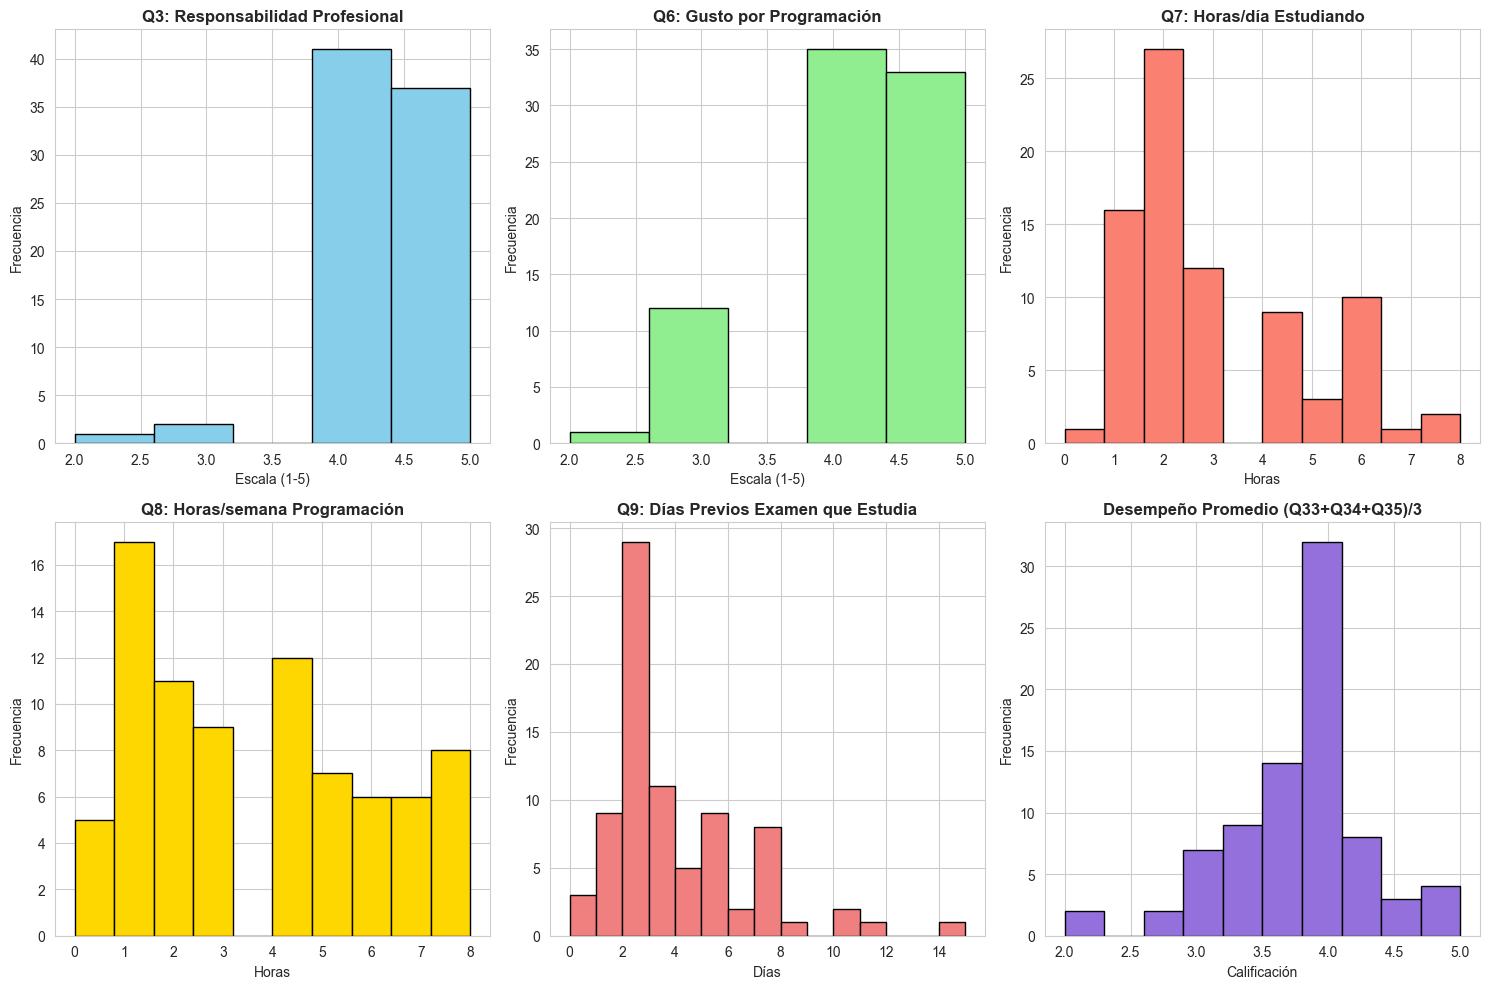


✅ Visualización completada


In [ ]:
# 7. DISTRIBUTION ANALYSIS - PART 1: ACADEMIC VARIABLES

print("="*80)
print("DISTRIBUTION ANALYSIS - ACADEMIC VARIABLES")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Q3: Responsibility
axes[0, 0].hist(df_numeric['Q3'].dropna(), bins=5, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Q3: Professional Responsibility', fontweight='bold')
axes[0, 0].set_xlabel('Scale (1-5)')
axes[0, 0].set_ylabel('Frequency')

# Q6: Programming Interest
axes[0, 1].hist(df_numeric['Q6'].dropna(), bins=5, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Q6: Programming Interest', fontweight='bold')
axes[0, 1].set_xlabel('Scale (1-5)')
axes[0, 1].set_ylabel('Frequency')

# Q7: Study Hours
axes[0, 2].hist(df_numeric['Q7'].dropna(), bins=10, color='salmon', edgecolor='black')
axes[0, 2].set_title('Q7: Hours/day Studying', fontweight='bold')
axes[0, 2].set_xlabel('Hours')
axes[0, 2].set_ylabel('Frequency')

# Q8: Programming Practice Hours
axes[1, 0].hist(df_numeric['Q8'].dropna(), bins=10, color='gold', edgecolor='black')
axes[1, 0].set_title('Q8: Hours/week Programming', fontweight='bold')
axes[1, 0].set_xlabel('Hours')
axes[1, 0].set_ylabel('Frequency')

# Q9: Days Before Exam Studying
axes[1, 1].hist(df_numeric['Q9'].dropna(), bins=15, color='lightcoral', edgecolor='black')
axes[1, 1].set_title('Q9: Days Before Exam Studies', fontweight='bold')
axes[1, 1].set_xlabel('Days')
axes[1, 1].set_ylabel('Frequency')

# Average Performance
axes[1, 2].hist(df_numeric['Average_Performance'].dropna(), bins=10, color='mediumpurple', edgecolor='black')
axes[1, 2].set_title('Average Performance (Q33+Q34+Q35)/3', fontweight='bold')
axes[1, 2].set_xlabel('Grade')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n✅ Visualization completed")

ANÁLISIS DE DISTRIBUCIONES - VARIABLES PSICOLÓGICAS Y SOCIOECONÓMICAS


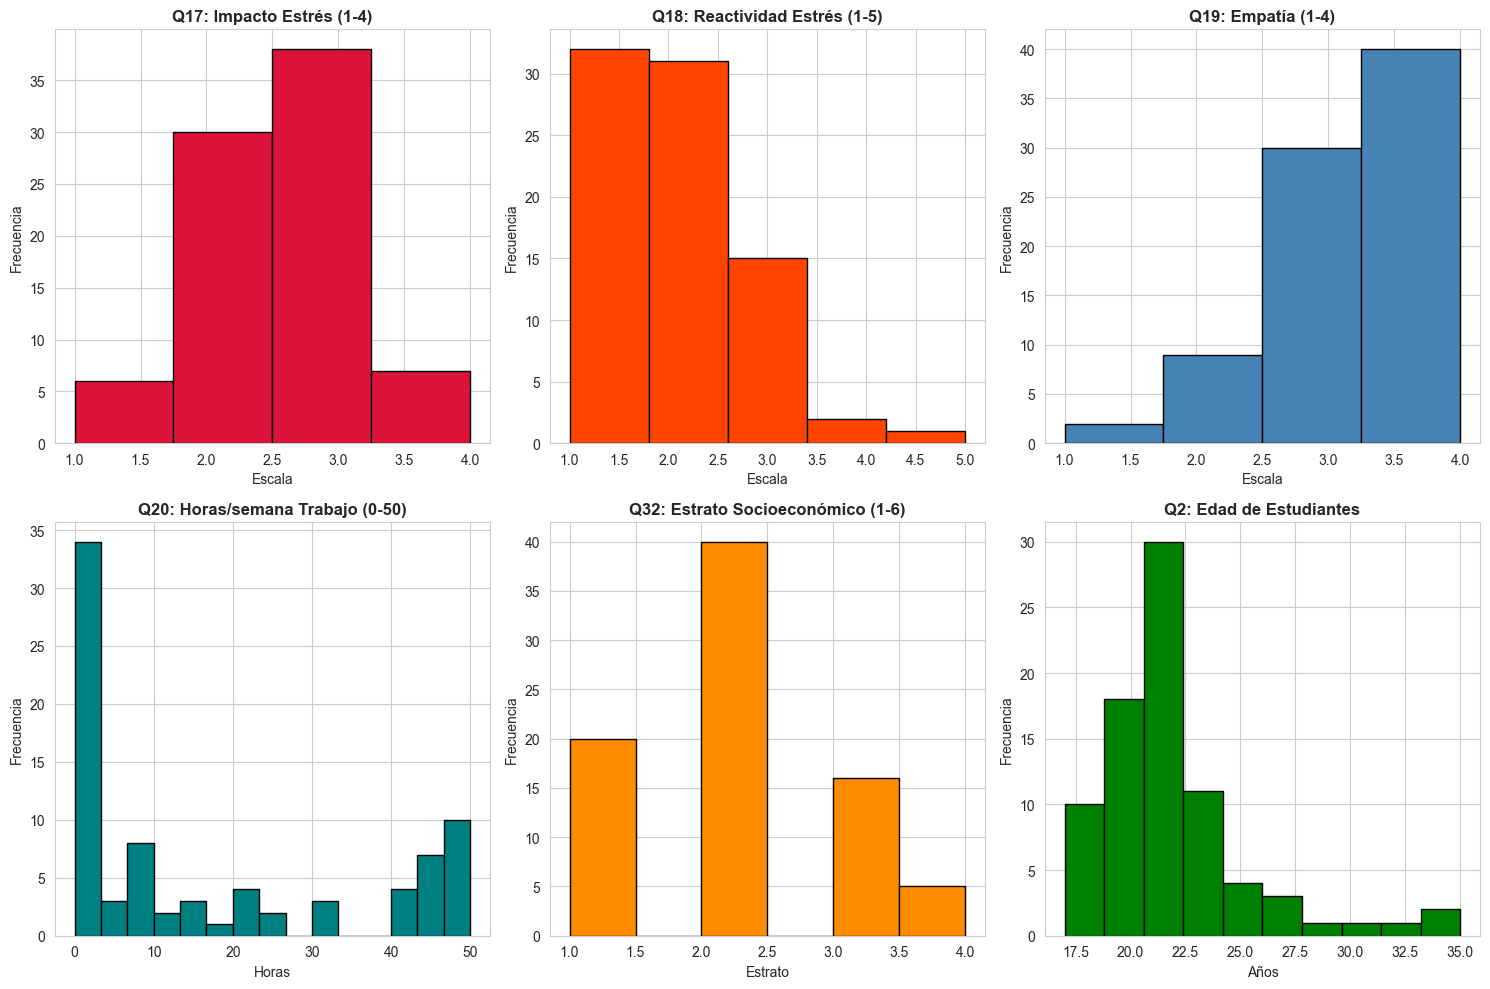


✅ Visualización completada


In [ ]:
# 8. DISTRIBUTION ANALYSIS - PART 2: PSYCHOLOGICAL AND SOCIOECONOMIC VARIABLES

print("="*80)
print("DISTRIBUTION ANALYSIS - PSYCHOLOGICAL AND SOCIOECONOMIC VARIABLES")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Q17: Stress Impact
axes[0, 0].hist(df_numeric['Q17'].dropna(), bins=4, color='crimson', edgecolor='black')
axes[0, 0].set_title('Q17: Stress Impact (1-4)', fontweight='bold')
axes[0, 0].set_xlabel('Scale')
axes[0, 0].set_ylabel('Frequency')

# Q18: Stress Reactivity
axes[0, 1].hist(df_numeric['Q18'].dropna(), bins=5, color='orangered', edgecolor='black')
axes[0, 1].set_title('Q18: Stress Reactivity (1-5)', fontweight='bold')
axes[0, 1].set_xlabel('Scale')
axes[0, 1].set_ylabel('Frequency')

# Q19: Empathy
axes[0, 2].hist(df_numeric['Q19'].dropna(), bins=4, color='steelblue', edgecolor='black')
axes[0, 2].set_title('Q19: Empathy (1-4)', fontweight='bold')
axes[0, 2].set_xlabel('Scale')
axes[0, 2].set_ylabel('Frequency')

# Q20: Work Hours
axes[1, 0].hist(df_numeric['Q20'].dropna(), bins=15, color='teal', edgecolor='black')
axes[1, 0].set_title('Q20: Hours/week Working (0-50)', fontweight='bold')
axes[1, 0].set_xlabel('Hours')
axes[1, 0].set_ylabel('Frequency')

# Q32: Socioeconomic Stratum
axes[1, 1].hist(df_numeric['Q32'].dropna(), bins=6, color='darkorange', edgecolor='black')
axes[1, 1].set_title('Q32: Socioeconomic Stratum (1-6)', fontweight='bold')
axes[1, 1].set_xlabel('Stratum')
axes[1, 1].set_ylabel('Frequency')

# Q2: Age
axes[1, 2].hist(df_numeric['Q2'].dropna(), bins=10, color='green', edgecolor='black')
axes[1, 2].set_title('Q2: Student Age', fontweight='bold')
axes[1, 2].set_xlabel('Years')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n✅ Visualization completed")

MATRIZ DE CORRELACIÓN - VARIABLES CLAVE


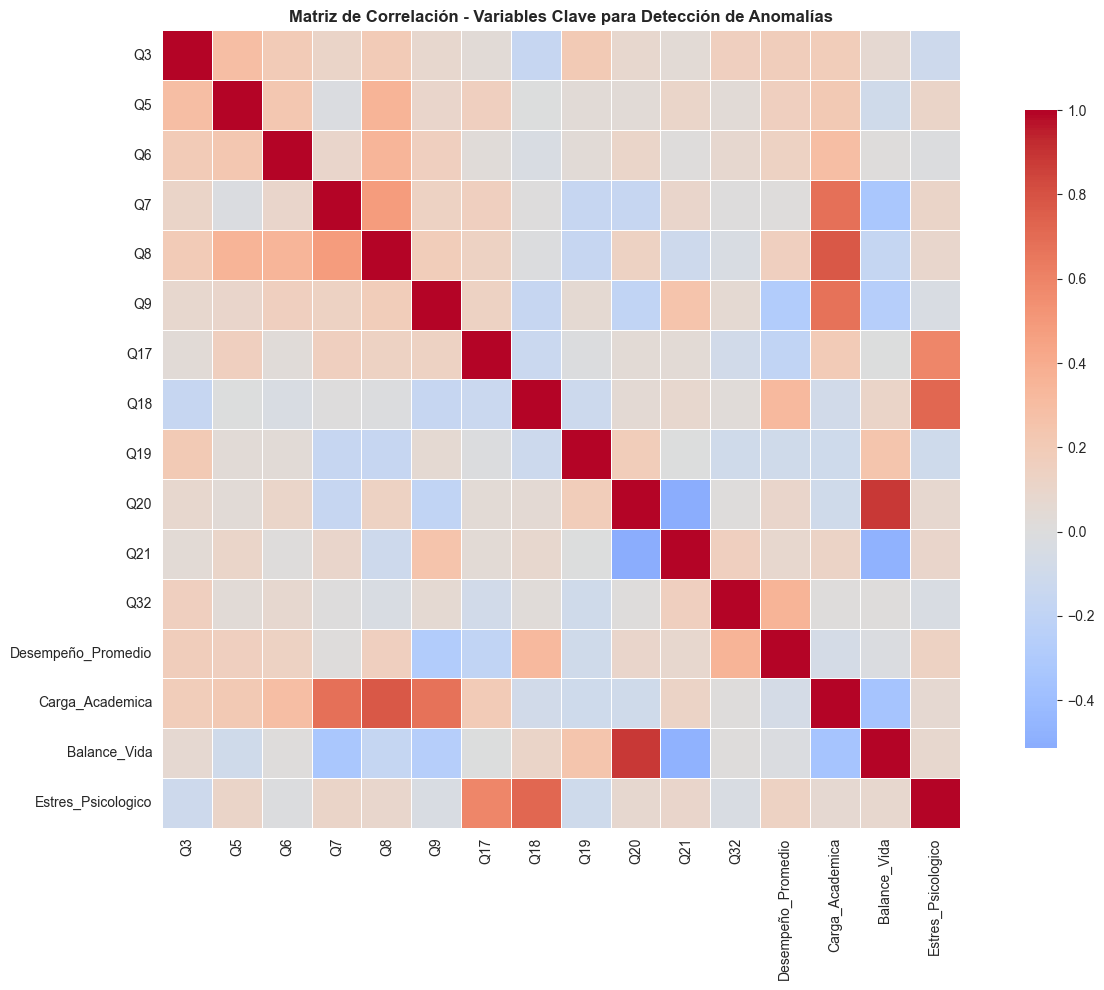


✅ Matriz de correlación visualizada


In [ ]:
# 9. CORRELATION MATRIX - KEY VARIABLES

print("="*80)
print("CORRELATION MATRIX - KEY VARIABLES")
print("="*80)

# Select key numeric variables
key_variables = ['Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q32',
                   'Average_Performance', 'Academic_Load', 'Life_Balance', 'Psychological_Stress']

# Create correlation matrix
corr_matrix = df_numeric[key_variables].corr()

# Visualize
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Key Variables for Anomaly Detection', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

print("\n✅ Correlation matrix visualized")

In [ ]:
# 10. DETAILED CORRELATION ANALYSIS

print("="*80)
print("IMPORTANT CORRELATIONS WITH ACADEMIC PERFORMANCE")
print("="*80)

# Correlations with performance
correlations = df_numeric[key_variables].corr()['Average_Performance'].sort_values(ascending=False)

print(f"\n📊 Correlations with Academic Performance:\n")
for var, corr in correlations.items():
    if var != 'Average_Performance':
        symbol = '↑' if corr > 0 else '↓'
        print(f"   {var:25s}: {corr:7.3f} {symbol}")

print(f"\n\n📊 Correlations with Psychological Stress:\n")
correlations_stress = df_numeric[key_variables].corr()['Psychological_Stress'].sort_values(ascending=False)
for var, corr in correlations_stress.items():
    if var != 'Psychological_Stress' and abs(corr) > 0.1:
        symbol = '↑' if corr > 0 else '↓'
        print(f"   {var:25s}: {corr:7.3f} {symbol}")

print(f"\n\n📊 Correlations with Life Balance:\n")
correlations_balance = df_numeric[key_variables].corr()['Life_Balance'].sort_values(ascending=False)
for var, corr in correlations_balance.items():
    if var != 'Life_Balance' and abs(corr) > 0.1:
        symbol = '↑' if corr > 0 else '↓'
        print(f"   {var:25s}: {corr:7.3f} {symbol}")

CORRELACIONES IMPORTANTES CON DESEMPEÑO ACADÉMICO

📊 Correlaciones con Desempeño Académico:

   Q32                      :   0.355 ↑
   Q18                      :   0.324 ↑
   Q3                       :   0.178 ↑
   Q5                       :   0.165 ↑
   Q8                       :   0.165 ↑
   Q6                       :   0.134 ↑
   Estres_Psicologico       :   0.131 ↑
   Q20                      :   0.101 ↑
   Q21                      :   0.080 ↑
   Q7                       :   0.009 ↑
   Balance_Vida             :  -0.018 ↓
   Carga_Academica          :  -0.070 ↓
   Q19                      :  -0.095 ↓
   Q17                      :  -0.191 ↓
   Q9                       :  -0.286 ↓


📊 Correlaciones con Estrés Psicológico:

   Q18                      :   0.722 ↑
   Q17                      :   0.587 ↑
   Desempeño_Promedio       :   0.131 ↑
   Q7                       :   0.114 ↑
   Q5                       :   0.107 ↑
   Q19                      :  -0.104 ↓
   Q3                   

In [ ]:
# 11. IDENTIFICATION OF POTENTIAL ANOMALIES - VISUAL ANALYSIS

print("="*80)
print("IDENTIFICATION OF POTENTIAL ANOMALIES - VISUAL ANALYSIS")
print("="*80)

# Create figure with scatter plots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Responsibility vs Performance',
        'Study Hours vs Performance',
        'Stress vs Performance',
        'Life Balance vs Performance'
    )
)

# 1. Responsibility vs Performance
fig.add_trace(
    go.Scatter(x=df_numeric['Q3'], y=df_numeric['Average_Performance'],
               mode='markers', marker=dict(size=8, color='blue', opacity=0.6),
               text=[f"St {i}" for i in range(len(df_numeric))],
               hovertemplate='%{text}<br>Responsibility: %{x}<br>Performance: %{y:.2f}<extra></extra>',
               name='Students'),
    row=1, col=1
)

# 2. Study Hours vs Performance
fig.add_trace(
    go.Scatter(x=df_numeric['Academic_Load'], y=df_numeric['Average_Performance'],
               mode='markers', marker=dict(size=8, color='green', opacity=0.6),
               text=[f"St {i}" for i in range(len(df_numeric))],
               hovertemplate='%{text}<br>Academic Load: %{x}<br>Performance: %{y:.2f}<extra></extra>',
               name='Students'),
    row=1, col=2
)

# 3. Stress vs Performance
fig.add_trace(
    go.Scatter(x=df_numeric['Psychological_Stress'], y=df_numeric['Average_Performance'],
               mode='markers', marker=dict(size=8, color='red', opacity=0.6),
               text=[f"St {i}" for i in range(len(df_numeric))],
               hovertemplate='%{text}<br>Stress: %{x:.2f}<br>Performance: %{y:.2f}<extra></extra>',
               name='Students'),
    row=2, col=1
)

# 4. Life Balance vs Performance
fig.add_trace(
    go.Scatter(x=df_numeric['Life_Balance'], y=df_numeric['Average_Performance'],
               mode='markers', marker=dict(size=8, color='orange', opacity=0.6),
               text=[f"St {i}" for i in range(len(df_numeric))],
               hovertemplate='%{text}<br>Balance: %{x:.2f}<br>Performance: %{y:.2f}<extra></extra>',
               name='Students'),
    row=2, col=2
)

# Update axes
fig.update_xaxes(title_text="Responsibility", row=1, col=1)
fig.update_xaxes(title_text="Academic Load", row=1, col=2)
fig.update_xaxes(title_text="Psychological Stress", row=2, col=1)
fig.update_xaxes(title_text="Life Balance", row=2, col=2)

fig.update_yaxes(title_text="Performance", row=1, col=1)
fig.update_yaxes(title_text="Performance", row=1, col=2)
fig.update_yaxes(title_text="Performance", row=2, col=1)
fig.update_yaxes(title_text="Performance", row=2, col=2)

fig.update_layout(height=800, showlegend=False, title_text="Analysis of Key Relationships for Anomaly Detection")
fig.show()

print("\n✅ Visualization completed")

IDENTIFICACIÓN DE POTENCIALES ANOMALÍAS - ANÁLISIS VISUAL



✅ Visualización completada


In [ ]:
# 12. ANALYSIS OF EXTREME VALUES AND SIMPLE OUTLIERS

print("="*80)
print("ANALYSIS OF EXTREME VALUES (Univariate)")
print("="*80)

# Function to detect extreme values (IQR method)
def detect_extremes(data, column, threshold=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - threshold * IQR
    upper_limit = Q3 + threshold * IQR
    return data[(data[column] < lower_limit) | (data[column] > upper_limit)]

# Analyze extremes in key variables
variables_to_analyze = ['Average_Performance', 'Academic_Load', 'Life_Balance', 
                      'Psychological_Stress', 'Q20', 'Responsibility_Result_Index']

print(f"\n📊 Students with extreme values:")
for var in variables_to_analyze:
    extremes = detect_extremes(df_numeric, var)
    if len(extremes) > 0:
        print(f"\n   {var}: {len(extremes)} student(s) with extreme values")
        print(f"      Min: {df_numeric[var].min():.2f}, Max: {df_numeric[var].max():.2f}")
    else:
        print(f"\n   {var}: No extreme values detected")

ANÁLISIS DE VALORES EXTREMOS (Univariados)

📊 Estudiantes con valores extremos:

   Desempeño_Promedio: 18 estudiante(s) con valores extremos
      Min: 2.00, Max: 5.00

   Carga_Academica: 2 estudiante(s) con valores extremos
      Min: 3.00, Max: 25.00

   Balance_Vida: 1 estudiante(s) con valores extremos
      Min: 0.00, Max: 10.00

   Estres_Psicologico: 2 estudiante(s) con valores extremos
      Min: 1.00, Max: 4.50

   Q20: Sin valores extremos detectados

   Indice_Resp_Resultado: 4 estudiante(s) con valores extremos
      Min: 0.46, Max: 1.67


In [ ]:
# 13. INITIAL INSIGHTS SUMMARY

print("="*80)
print("INITIAL INSIGHTS FOR ANOMALY DETECTION")
print("="*80)

print(f"\n🔍 KEY FINDINGS FROM EDA:")

print(f"\n1️⃣  ACADEMIC PERFORMANCE:")
print(f"   • Average: {df_numeric['Average_Performance'].mean():.2f}/5")
print(f"   • Range: {df_numeric['Average_Performance'].min():.2f} - {df_numeric['Average_Performance'].max():.2f}")
print(f"   • Std Dev: {df_numeric['Average_Performance'].std():.2f}")

print(f"\n2️⃣  ACADEMIC DEDICATION:")
print(f"   • Average study hours/day: {df_numeric['Q7'].mean():.2f}h")
print(f"   • Average programming hours/week: {df_numeric['Q8'].mean():.2f}h")
print(f"   • Correlation: More study hours → Better performance: {df_numeric[['Q7', 'Average_Performance']].corr().iloc[0,1]:.3f}")

print(f"\n3️⃣  STRESS AND MENTAL HEALTH:")
print(f"   • Average stress: {df_numeric['Psychological_Stress'].mean():.2f}/5")
print(f"   • Correlation: Stress ↔ Performance: {df_numeric[['Psychological_Stress', 'Average_Performance']].corr().iloc[0,1]:.3f}")
print(f"   • Correlation: Stress ↔ Empathy: {df_numeric[['Psychological_Stress', 'Q19']].corr().iloc[0,1]:.3f}")

print(f"\n4️⃣  WORK-STUDY BALANCE:")
print(f"   • Average work hours/week: {df_numeric['Q20'].mean():.2f}h")
print(f"   • Students working (Q20>0): {(df_numeric['Q20'] > 0).sum()} ({100*(df_numeric['Q20'] > 0).sum()/len(df_numeric):.1f}%)")
print(f"   • Correlation: Work hours ↔ Performance: {df_numeric[['Q20', 'Average_Performance']].corr().iloc[0,1]:.3f}")

print(f"\n5️⃣  SOCIOECONOMIC FACTORS:")
print(f"   • Average stratum: {df_numeric['Q32'].mean():.2f}")
print(f"   • With financial support (Q21=1): {(df_numeric['Q21'] == 1).sum()} ({100*(df_numeric['Q21'] == 1).sum()/len(df_numeric):.1f}%)")
print(f"   • Correlation: Stratum ↔ Performance: {df_numeric[['Q32', 'Average_Performance']].corr().iloc[0,1]:.3f}")

print(f"\n6️⃣  DETECTED INCONSISTENCIES:")
inconsistent_students = df_numeric[df_numeric['Responsibility_Result_Index'] > df_numeric['Responsibility_Result_Index'].quantile(0.75)]
print(f"   • Very responsible but low performance: {len(inconsistent_students)} student(s)")

overloaded_students = df_numeric[(df_numeric['Life_Balance'] > df_numeric['Life_Balance'].quantile(0.75)) & 
                                        (df_numeric['Average_Performance'] < df_numeric['Average_Performance'].quantile(0.25))]
print(f"   • Much work + low performance: {len(overloaded_students)} student(s)")

stressed_students = df_numeric[(df_numeric['Psychological_Stress'] > df_numeric['Psychological_Stress'].quantile(0.75)) & 
                                      (df_numeric['Q19'] < df_numeric['Q19'].quantile(0.25))]
print(f"   • High stress + low empathy: {len(stressed_students)} student(s)")

print(f"\n\n✅ INITIAL EDA COMPLETED")
print(f"\n📌 NEXT STEPS:")
print(f"   1. Normalize data for anomaly detection models")
print(f"   2. Train Isolation Forest")
print(f"   3. Train Local Outlier Factor (LOF)")
print(f"   4. Train One-Class SVM")
print(f"   5. Compare results and create consensus")
print(f"   6. Analyze and interpret detected anomalies")

INSIGHTS INICIALES PARA DETECCIÓN DE ANOMALÍAS

🔍 DESCUBRIMIENTOS CLAVE DEL EDA:

1️⃣  DESEMPEÑO ACADÉMICO:
   • Promedio: 3.81/5
   • Rango: 2.00 - 5.00
   • Desv. Estándar: 0.58

2️⃣  DEDICACIÓN ACADÉMICA:
   • Horas estudio/día promedio: 2.96h
   • Horas programación/semana promedio: 3.59h
   • Correlación: Más horas estudio → Mejor desempeño: 0.009

3️⃣  ESTRÉS Y SALUD MENTAL:
   • Estrés promedio: 2.22/5
   • Correlación: Estrés ↔ Desempeño: 0.131
   • Correlación: Estrés ↔ Empatía: -0.104

4️⃣  BALANCE TRABAJO-ESTUDIO:
   • Promedio horas trabajo/semana: 16.62h
   • Estudiantes que trabajan (Q20>0): 47 (58.0%)
   • Correlación: Horas trabajo ↔ Desempeño: 0.101

5️⃣  FACTORES SOCIOECONÓMICOS:
   • Estrato promedio: 2.07
   • Con apoyo financiero (Q21=1): 54 (66.7%)
   • Correlación: Estrato ↔ Desempeño: 0.355

6️⃣  INCONSISTENCIAS DETECTADAS:
   • Muy responsables pero bajo desempeño: 14 estudiante(s)
   • Mucho trabajo + bajo desempeño: 5 estudiante(s)
   • Alto estrés + baja emp